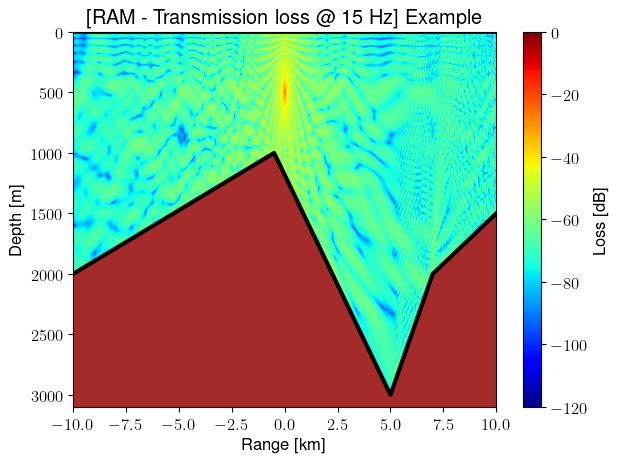

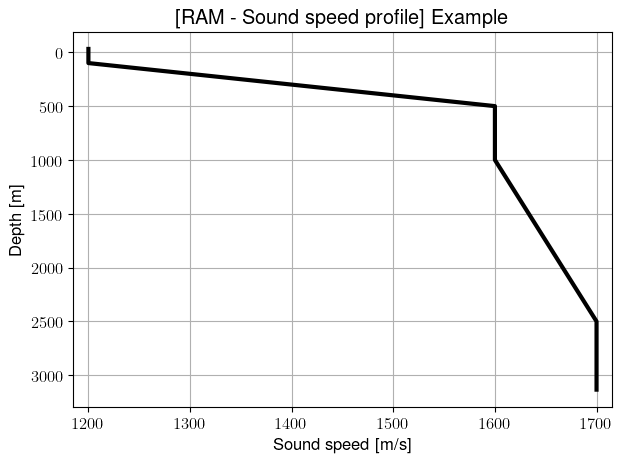

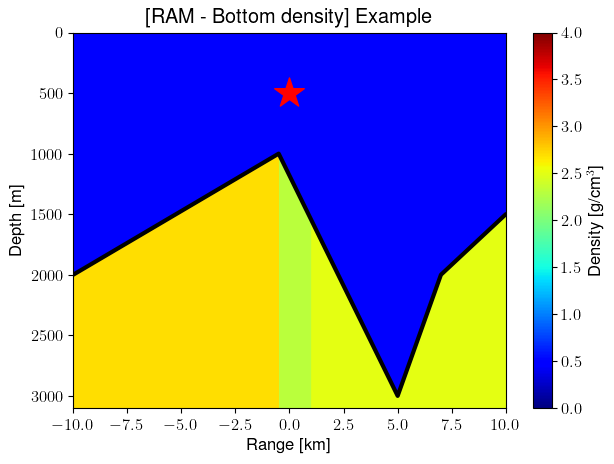

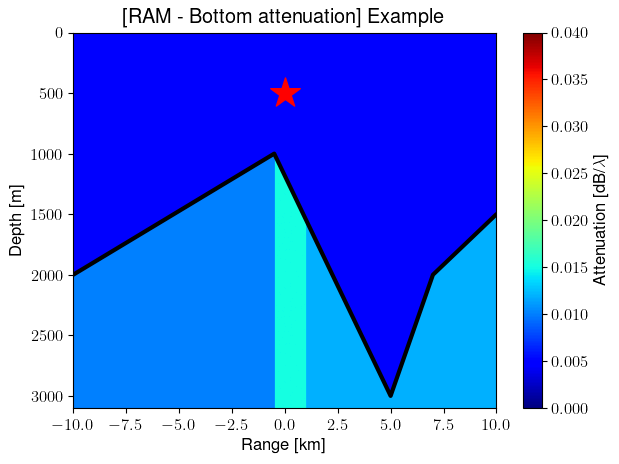

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': '[RAM - Bottom attenuation] Example'}, xlabel='Range [km]', ylabel='Depth [m]'>)

In [1]:
import arlpy.uwapm as pm
import numpy as np

x = np.linspace(-10000, 10000, 1081)
z = np.linspace(0, 3100,  720)

ssp_range = 0
ssp_depth = np.array([100, 500, 1000, 2500])
ssp       = np.array([1200,  1600, 1600, 1700])

bot_range     = np.array([-10000, -500, 5000, 7000, 10000])
bot_interface = np.array([2000, 1000, 3000, 2000, 1500])

bot_xrange = np.array([-1000, 0, 2000])
bot_xdepth = 0

bot_attenuation = np.array([0.01, 0.015, 0.012])
bot_ssp = np.array([5000, 6600, 5900])
bot_density = np.array([2.7, 2.3, 2.5])

env = pm.make_env2d(
            
    pad_inputData   = True, 
    name            = 'Example',
    
    # ALL: Receiver positoins
    rx_range        = x,                                                   # m
    rx_depth        = z,                                                   # m
    
    # ALL: Sound speed profiles
    ssp_range       = ssp_range,                                           # m
    ssp_depth       = ssp_depth,                                           # m
    ssp             = ssp,                                                 # m/s
    
    # ALL: Source freq and depth
    tx_freq         = 15,                                                 # Hz
    tx_depth        = 500,                                                  # m

    # ALL: Bottom interface
    bot_interface   = np.column_stack((bot_range,bot_interface)),          # m
                                                    
    # RAM: Bottom settings   
    bot_range       = bot_xrange,
    bot_depth       = bot_xdepth,
    bot_PwaveSpeed  = bot_ssp,
    bot_density     = bot_density,
    bot_PwaveAttn   = bot_attenuation,
    )

RAM = pm.RAM(env)
RAM.compute_transmission_loss()

RAM.plot_transmission_loss()
RAM.plot_ssp()
RAM.plot_bot_density()
RAM.plot_bot_attn()
